In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import collections
import pandas as pd
import sys
import math
import itertools
#this will allow the plot to be inline in the browser
%matplotlib inline

In [3]:
nodes = pd.read_csv('ce263n_cyp257_nodes.csv')
nodes.head(2)

,node id,Name,Majors,Research Area of Interest,Hobby,Desired Job,"Gender Identity (F, M, O)"
0,1,"Shiraishi, Kenji",Public Policy PhD,na,na,na,na
1,2,"Yeskoo, Andrew",Civil & Environmental Eng PhD,"Instrumentation and monitoring, machine learning","skiing, car racing, hiking, camping",engineer,M


In [4]:
g_random= pd.read_csv('ce263n_cyp257_links_random.csv')
g_random.head(2)

,source,target
0,7,18
1,7,14


In [5]:
g_interest= pd.read_csv('ce263n_cyp257_links_interestes.csv')
g_interest.head(2)

,source,target,weight
0,62,63,2.0
1,62,45,2.0


In [6]:
g_acquaintances= pd.read_csv('ce263n_cyp257_links_acquaintances.csv')
g_acquaintances.head(2)

,source,target,weight
0,7,16,3
1,7,15,1


In [7]:
def get_key(val, my_dict): 
    keys = []
    for key, value in my_dict.items(): 
         if val == value:
                keys.append(key)
    if len(keys) == 0:
        return "key doesn't exist"
        
    return keys

### Random Graph

In [8]:
# Create empty graph
g_r = nx.DiGraph()
## import nodes data
fn=pd.read_csv('ce263n_cyp257_nodes.csv',delimiter=',',index_col=0).transpose()
n_attr=len(fn.index.values)
attr=fn.index.values
## nodes and attributes
for n in fn.columns:
        g_r.add_node(n,Name=fn[n].values[0],Majors=fn[n].values[1],Research_Area_of_Interest=fn[n].values[2],
               Hobby=fn[n].values[3],Desired_Job=fn[n].values[4],Gender_Identity=fn[n].values[5])

# Add edges and edge attributes
for i, elrow in g_random.iterrows():
    g_r.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())
    
## remove the nodes with zero connection
deg = g_r.degree()
to_keep = []
for node in g_r.nodes():
    if deg[node] != 0:
        to_keep.append(node)
#     else:
#         print("Node: ",node," degree: ",deg[node])
#Create the network only with connected nodes
g_r = g_r.subgraph(to_keep)
    
## summary stats
print('-----------------Summary Statistics------------------------------')
print('# of edges: {}'.format(g_r.number_of_edges()))
print('# of nodes: {}'.format(g_r.number_of_nodes()))
print ("Average out-degree of  directed graph = ",np.mean(list(dict(g_r.out_degree()).values())))
print ("Average in-degree of  directed graph = ",np.mean(list(dict(g_r.in_degree()).values())))
print ("Average degree of  directed graph = ",np.mean(list(dict(g_r.degree()).values())))

-----------------Summary Statistics------------------------------
# of edges: 183
# of nodes: 60
Average out-degree of  directed graph =  3.05
Average in-degree of  directed graph =  3.05
Average degree of  directed graph =  6.1


In [9]:
print ("Maximum in-degree of  directed graph = ",np.max(list(dict(g_r.in_degree()).values())))
## dictionary of key/value pairs ( key - node, value - in-degree)
my_dict = dict(g_r.in_degree())
## Maximum in-degree of  directed graph 
max_in_d = np.max(list(dict(g_r.in_degree()).values()))
# 
# print(' node ids of students with Maximum in-degree: ',list(my_dict.keys())[list(my_dict.values()).index(max_in_d)]) 
print('Node ids of students with Maximum in-degree: ',get_key(max_in_d, my_dict))

Maximum in-degree of  directed graph =  8
Node ids of students with Maximum in-degree:  [2]


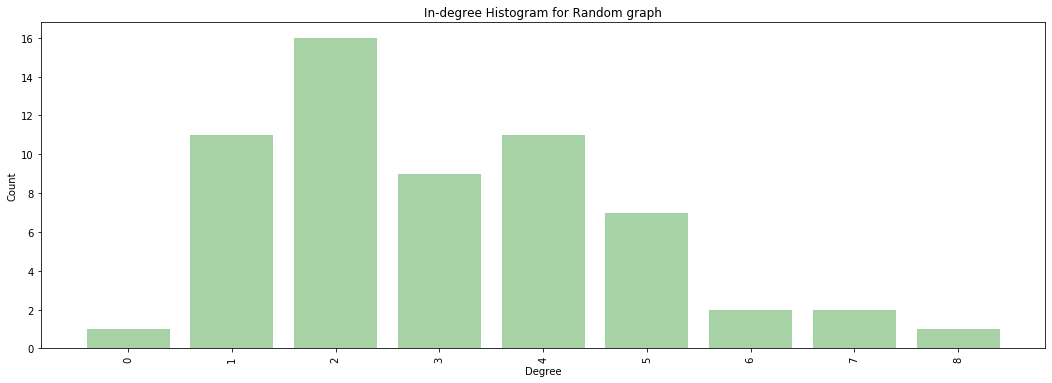

In [10]:
## plot histogram of in_degree distribution
degree_sequence = sorted([d for n, d in g_r.in_degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(18,6))
plt.bar(deg, cnt, width=0.80, color="g", alpha = 0.35)

plt.title("In-degree Histogram for Random graph")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d  for d in deg])
plt.xticks(rotation=90)
ax.set_xticklabels(deg);

In [11]:
## check is graph is weakly connected 
print(nx.is_weakly_connected(g_r))
print('Clustering coefficient: ', nx.average_clustering(g_r))
print('Average Shortest path: ',nx.average_shortest_path_length(g_r))

True
Clustering coefficient:  0.04550364758698092
Average Shortest path:  2.4966101694915253


C:\Users\mmoud\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\mmoud\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


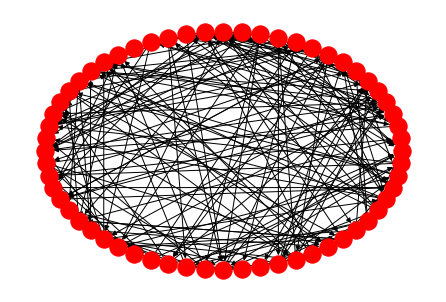

In [12]:
## draw random graph
nx.draw_circular(g_r);

C:\Users\mmoud\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


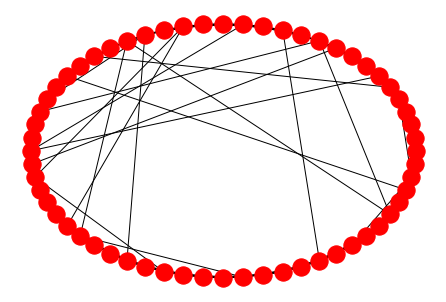

In [13]:
## small world network - random model, p=1
sw_gr = nx.watts_strogatz_graph(60,6,0.1)
nx.draw_circular(sw_gr);

In [15]:
## summary stats for sw_gr
print('-----------------Summary Statistics------------------------------')
print('# of edges: {}'.format(sw_gr.number_of_edges()))
print('# of nodes: {}'.format(sw_gr.number_of_nodes()))
print ("Average degree of  directed graph = ",np.mean(list(dict(sw_gr.degree()).values())))
print('Clustering coefficient: ', nx.average_clustering(sw_gr))
print('Average Shortest path: ',nx.average_shortest_path_length(sw_gr))

-----------------Summary Statistics------------------------------
# of edges: 180
# of nodes: 60
Average degree of  directed graph =  6.0
Clustering coefficient:  0.4429365079365079
Average Shortest path:  3.1209039548022597


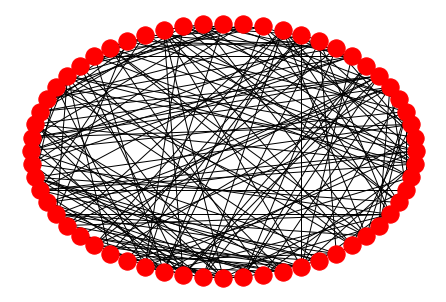

In [16]:
## small world network - random model, p=1
ran_gr = nx.watts_strogatz_graph(60,6,1)
nx.draw_circular(ran_gr);

In [39]:
## summary stats for sw_gr
print('-----------------Summary Statistics------------------------------')
print('# of edges: {}'.format(ran_gr.number_of_edges()))
print('# of nodes: {}'.format(ran_gr.number_of_nodes()))
print ("Average degree of  directed graph = ",np.mean(list(dict(ran_gr.degree()).values())))
print('Clustering coefficient: ', nx.average_clustering(ran_gr))
print('Average Shortest path: ',nx.average_shortest_path_length(ran_gr))

-----------------Summary Statistics------------------------------
# of edges: 180
# of nodes: 60
Average degree of  directed graph =  6.0
Clustering coefficient:  0.07886243386243384
Average Shortest path:  2.4259887005649716


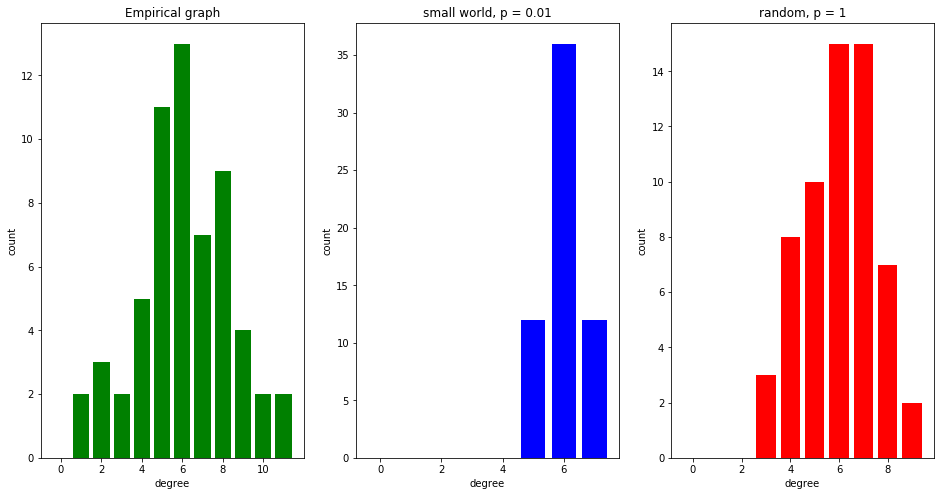

In [46]:
#G1:
degrees1 = list(dict(nx.degree(g_r)).values())
counts1,bins1 = np.histogram(degrees1,bins=np.arange(0,np.max(degrees1)+2))
#G2:
degrees2 = list(dict(nx.degree(sw_gr)).values())
counts2,bins2 = np.histogram(degrees2,bins=np.arange(0,np.max(degrees2)+2))
#G3:
degrees3 = list(dict(nx.degree(ran_gr)).values())
counts3,bins3 = np.histogram(degrees3,bins=np.arange(0,np.max(degrees3)+2))


plt.figure(figsize=(16,8)) #you only have to use this line once and fill in the blank spaces

#G1:
plt.subplot(1,3,1)
plt.bar(bins1[:-1],counts1,color='g')
plt.xlabel('degree')
plt.ylabel('count')
plt.title('Empirical graph')

#G2:
plt.subplot(1,3,2)
plt.bar(bins2[:-1],counts2,color='b')
plt.xlabel('degree')
plt.ylabel('count')
plt.title('small world, p = 0.01')

#G3:
plt.subplot(1,3,3)
plt.bar(bins3[:-1],counts3,color='r')
plt.xlabel('degree')
plt.ylabel('count')
plt.title('random, p = 1');



## Interests Graph

In [17]:
# Create empty graph
g_i = nx.DiGraph()
## import nodes data
fn=pd.read_csv('ce263n_cyp257_nodes.csv',delimiter=',',index_col=0).transpose()
n_attr=len(fn.index.values)
attr=fn.index.values
## nodes and attributes
for n in fn.columns:
        g_i.add_node(n,Name=fn[n].values[0],Majors=fn[n].values[1],Research_Area_of_Interest=fn[n].values[2],
               Hobby=fn[n].values[3],Desired_Job=fn[n].values[4],Gender_Identity=fn[n].values[5])

# Add edges and edge attributes
for i, elrow in g_interest.iterrows():
    g_i.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())
    
## remove the nodes with zero connection
deg = g_i.degree()
to_keep = []
for node in g_i.nodes():
    if deg[node] != 0:
        to_keep.append(node)
#     else:
#         print("Node: ",node," degree: ",deg[node])
#Create the network only with connected nodes
g_i = g_i.subgraph(to_keep)
    
## summary stats
print('-----------------Summary Statistics------------------------------')
print('# of edges: {}'.format(g_i.number_of_edges()))
print('# of nodes: {}'.format(g_i.number_of_nodes()))
print ("Average out-degree of  directed graph = ",np.mean(list(dict(g_i.out_degree()).values())))
print ("Average in-degree of  directed graph = ",np.mean(list(dict(g_i.in_degree()).values())))
print ("Average degree of  directed graph = ",np.mean(list(dict(g_i.degree()).values())))

-----------------Summary Statistics------------------------------
# of edges: 176
# of nodes: 53
Average out-degree of  directed graph =  3.3207547169811322
Average in-degree of  directed graph =  3.3207547169811322
Average degree of  directed graph =  6.6415094339622645


In [18]:
print ("Maximum in-degree of  directed graph = ",np.max(list(dict(g_i.in_degree()).values())))
## dictionary of key/value pairs ( key - node, value - in-degree)
my_dict = dict(g_i.in_degree())
## Maximum in-degree of  directed graph 
max_in_d = np.max(list(dict(g_i.in_degree()).values()))
# 
# print(' node ids of students with Maximum in-degree: ',list(my_dict.keys())[list(my_dict.values()).index(max_in_d)])
print('Node ids of students with Maximum in-degree: ',get_key(max_in_d, my_dict))

Maximum in-degree of  directed graph =  12
Node ids of students with Maximum in-degree:  [60]


In [19]:
# my_dict

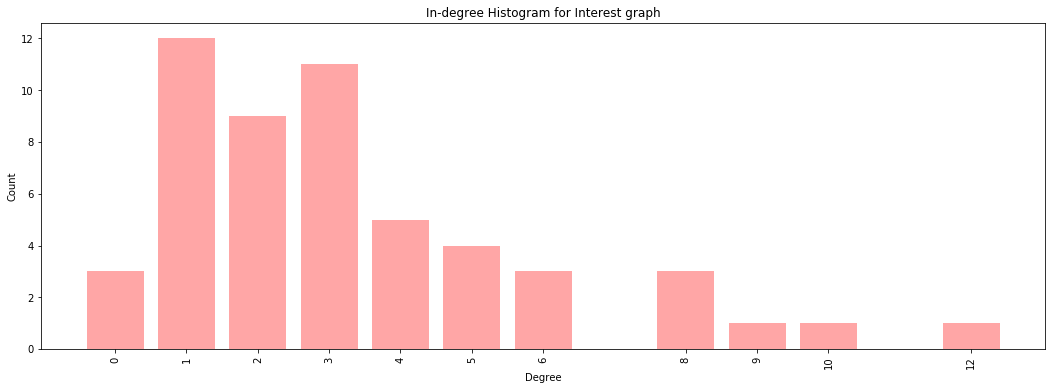

In [20]:
## plot histogram of in_degree distribution
degree_sequence = sorted([d for n, d in g_i.in_degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(18,6))
plt.bar(deg, cnt, width=0.80, color="r", alpha = 0.35)

plt.title("In-degree Histogram for Interest graph")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d  for d in deg])
plt.xticks(rotation=90)
ax.set_xticklabels(deg);

In [21]:
## check is graph is weakly connected 
print(nx.is_weakly_connected(g_i))
print('Clustering coefficient: ', nx.average_clustering(g_i))
print('Average Shortest path: ',nx.average_shortest_path_length(g_i))

True
Clustering coefficient:  0.09671427111771108
Average Shortest path:  2.4727866473149493


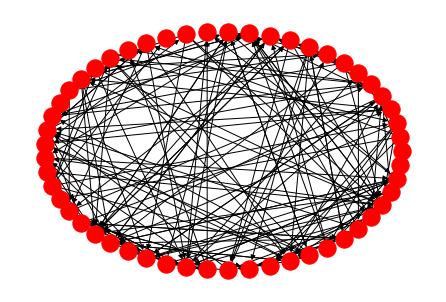

In [22]:
## draw interest graph
nx.draw_circular(g_i)

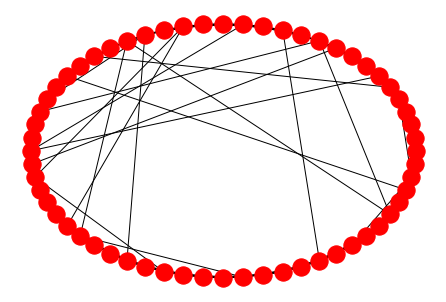

In [53]:
## small world network, p=0.1
sw_gi = nx.watts_strogatz_graph(53,6,0.1)
nx.draw_circular(sw_gr);

In [54]:
## summary stats for sw_gr
print('-----------------Summary Statistics------------------------------')
print('# of edges: {}'.format(sw_gi.number_of_edges()))
print('# of nodes: {}'.format(sw_gi.number_of_nodes()))
print ("Average degree of  directed graph = ",np.mean(list(dict(sw_gi.degree()).values())))
print('Clustering coefficient: ', nx.average_clustering(sw_gi))
print('Average Shortest path: ',nx.average_shortest_path_length(sw_gi))

-----------------Summary Statistics------------------------------
# of edges: 159
# of nodes: 53
Average degree of  directed graph =  6.0
Clustering coefficient:  0.43787061994609155
Average Shortest path:  2.8381712626995648


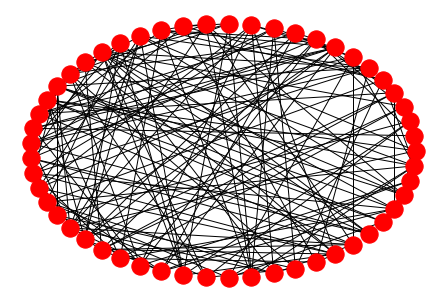

In [55]:
##  random model, p=1
ran_gi = nx.watts_strogatz_graph(53,6,1)
nx.draw_circular(ran_gi);

In [50]:
## summary stats for sw_gr
print('-----------------Summary Statistics------------------------------')
print('# of edges: {}'.format(ran_gi.number_of_edges()))
print('# of nodes: {}'.format(ran_gi.number_of_nodes()))
print ("Average degree of  directed graph = ",np.mean(list(dict(ran_gi.degree()).values())))
print('Clustering coefficient: ', nx.average_clustering(ran_gi))
print('Average Shortest path: ',nx.average_shortest_path_length(ran_gi))

-----------------Summary Statistics------------------------------
# of edges: 212
# of nodes: 53
Average degree of  directed graph =  8.0
Clustering coefficient:  0.13128370581200768
Average Shortest path:  2.074746008708273


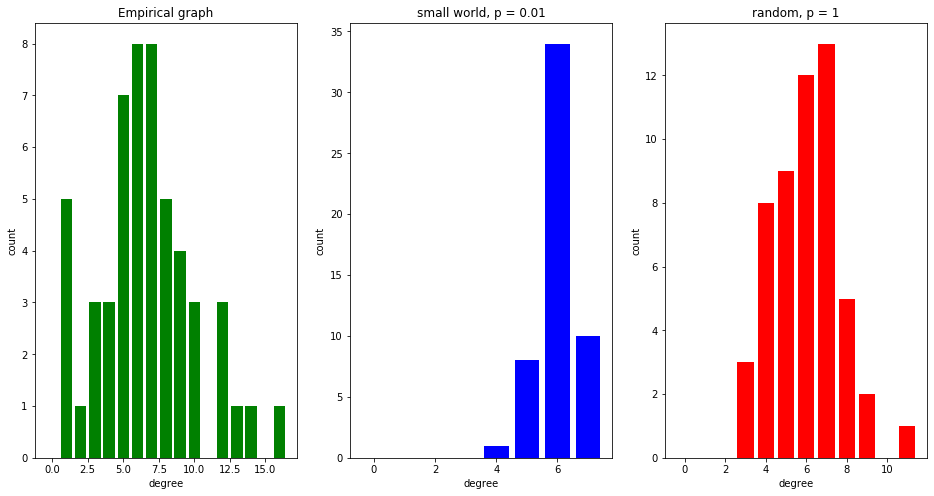

In [47]:
#G1:
degrees1 = list(dict(nx.degree(g_i)).values())
counts1,bins1 = np.histogram(degrees1,bins=np.arange(0,np.max(degrees1)+2))
#G2:
degrees2 = list(dict(nx.degree(sw_gi)).values())
counts2,bins2 = np.histogram(degrees2,bins=np.arange(0,np.max(degrees2)+2))
#G3:
degrees3 = list(dict(nx.degree(ran_gi)).values())
counts3,bins3 = np.histogram(degrees3,bins=np.arange(0,np.max(degrees3)+2))


plt.figure(figsize=(16,8)) #you only have to use this line once and fill in the blank spaces

#G1:
plt.subplot(1,3,1)
plt.bar(bins1[:-1],counts1,color='g')
plt.xlabel('degree')
plt.ylabel('count')
plt.title('Empirical graph')

#G2:
plt.subplot(1,3,2)
plt.bar(bins2[:-1],counts2,color='b')
plt.xlabel('degree')
plt.ylabel('count')
plt.title('small world, p = 0.01')

#G3:
plt.subplot(1,3,3)
plt.bar(bins3[:-1],counts3,color='r')
plt.xlabel('degree')
plt.ylabel('count')
plt.title('random, p = 1');



## Acquaintances graph

In [26]:

# Create empty graph
g_a = nx.DiGraph()

## import nodes data
fn=pd.read_csv('ce263n_cyp257_nodes.csv',delimiter=',',index_col=0).transpose()
n_attr=len(fn.index.values)
attr=fn.index.values
## nodes and attributes
for n in fn.columns:
        g_a.add_node(n,Name=fn[n].values[0],Majors=fn[n].values[1],Research_Area_of_Interest=fn[n].values[2],
               Hobby=fn[n].values[3],Desired_Job=fn[n].values[4],Gender_Identity=fn[n].values[5])

# Add edges and edge attributes
for i, elrow in g_acquaintances.iterrows():
    g_a.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())
    
## remove the nodes with zero connection
deg = g_a.degree()
to_keep = []
for node in g_a.nodes():
    if deg[node] != 0:
        to_keep.append(node)
#     else:
#         print("Node: ",node," degree: ",deg[node])
#Create the network only with connected nodes
g_a = g_a.subgraph(to_keep)
    
## summary stats
print('-----------------Summary Statistics------------------------------')
print('# of edges: {}'.format(g_a.number_of_edges()))
print('# of nodes: {}'.format(g_a.number_of_nodes()))
print ("Average out-degree of  directed graph = ",np.mean(list(dict(g_a.out_degree()).values())))
print ("Average in-degree of  directed graph = ",np.mean(list(dict(g_a.in_degree()).values())))
print ("Average degree of  directed graph = ",np.mean(list(dict(g_a.degree()).values())))

-----------------Summary Statistics------------------------------
# of edges: 146
# of nodes: 52
Average out-degree of  directed graph =  2.8076923076923075
Average in-degree of  directed graph =  2.8076923076923075
Average degree of  directed graph =  5.615384615384615


In [27]:
print ("Maximum in-degree of  directed graph = ",np.max(list(dict(g_a.in_degree()).values())))
## dictionary of key/value pairs ( key - node, value - in-degree)
my_dict = dict(g_a.in_degree())
## Maximum in-degree of  directed graph 
max_in_d = np.max(list(dict(g_a.in_degree()).values()))
# 
# print(' node ids of students with Maximum in-degree: ',list(my_dict.keys())[list(my_dict.values()).index(max_in_d)]) 
print('Node ids of students with Maximum in-degree: ',get_key(max_in_d, my_dict))

Maximum in-degree of  directed graph =  9
Node ids of students with Maximum in-degree:  [5, 24]


In [28]:
# my_dict

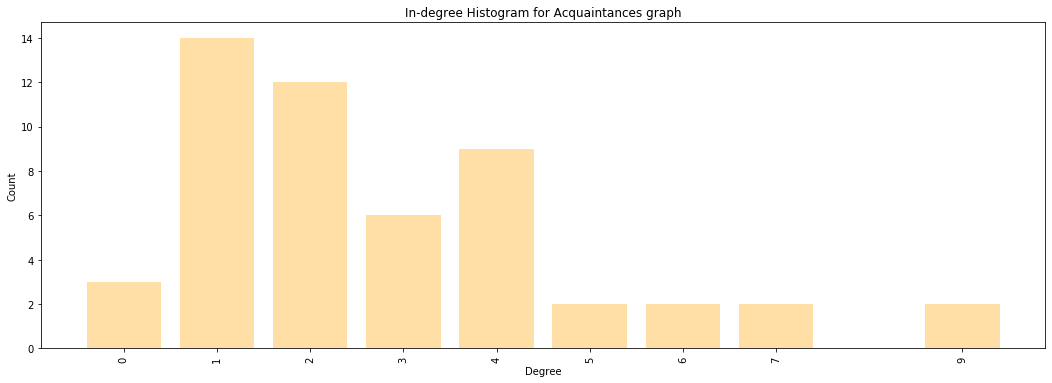

In [29]:
## plot histogram of in_degree distribution
degree_sequence = sorted([d for n, d in g_a.in_degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(18,6))
plt.bar(deg, cnt, width=0.80, color="orange", alpha = 0.35)

plt.title("In-degree Histogram for Acquaintances graph")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d  for d in deg])
plt.xticks(rotation=90)
ax.set_xticklabels(deg);

In [30]:
## check is graph is weakly connected 
print(nx.is_weakly_connected(g_a))
print('Clustering coefficient: ', nx.average_clustering(g_a))
print('Average Shortest path: ',nx.average_shortest_path_length(g_a))

True
Clustering coefficient:  0.23710934949414894
Average Shortest path:  1.5995475113122173


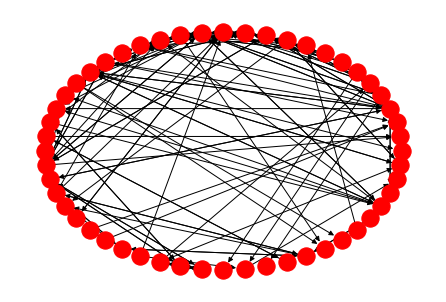

In [31]:
## draw acquaintances graph
nx.draw_circular(g_a)

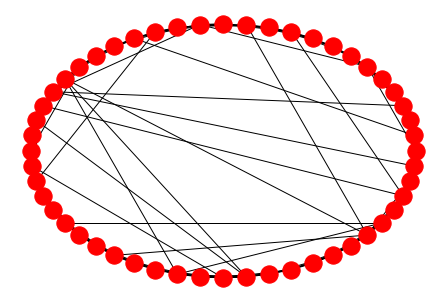

In [32]:
## small world network p=0.1
sw_ga = nx.watts_strogatz_graph(52,6,0.1)
nx.draw_circular(sw_ga);

In [38]:
print('-----------------Summary Statistics------------------------------')
print('# of edges: {}'.format(sw_ga.number_of_edges()))
print('# of nodes: {}'.format(sw_ga.number_of_nodes()))
print ("Average degree of  directed graph = ",np.mean(list(dict(sw_ga.degree()).values())))
print('Clustering coefficient: ', nx.average_clustering(sw_ga))
print('Average Shortest path: ',nx.average_shortest_path_length(sw_ga))

-----------------Summary Statistics------------------------------
# of edges: 156
# of nodes: 52
Average degree of  directed graph =  6.0
Clustering coefficient:  0.3991300366300366
Average Shortest path:  2.879336349924585


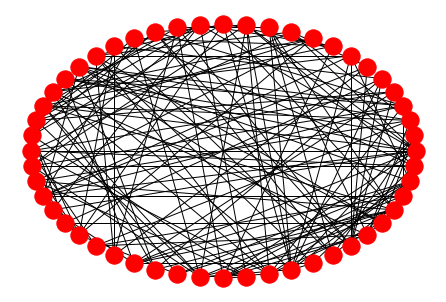

In [34]:
## random model, p=1
ran_ga = nx.watts_strogatz_graph(52,6,1)
nx.draw_circular(ran_ga);

In [41]:
## summary stats for sw_gr
print('-----------------Summary Statistics------------------------------')
print('# of edges: {}'.format(ran_ga.number_of_edges()))
print('# of nodes: {}'.format(ran_ga.number_of_nodes()))
print ("Average degree of  directed graph = ",np.mean(list(dict(ran_ga.degree()).values())))
print('Clustering coefficient: ', nx.average_clustering(ran_ga))
print('Average Shortest path: ',nx.average_shortest_path_length(ran_ga))

-----------------Summary Statistics------------------------------
# of edges: 156
# of nodes: 52
Average degree of  directed graph =  6.0
Clustering coefficient:  0.08173076923076922
Average Shortest path:  2.3423831070889896


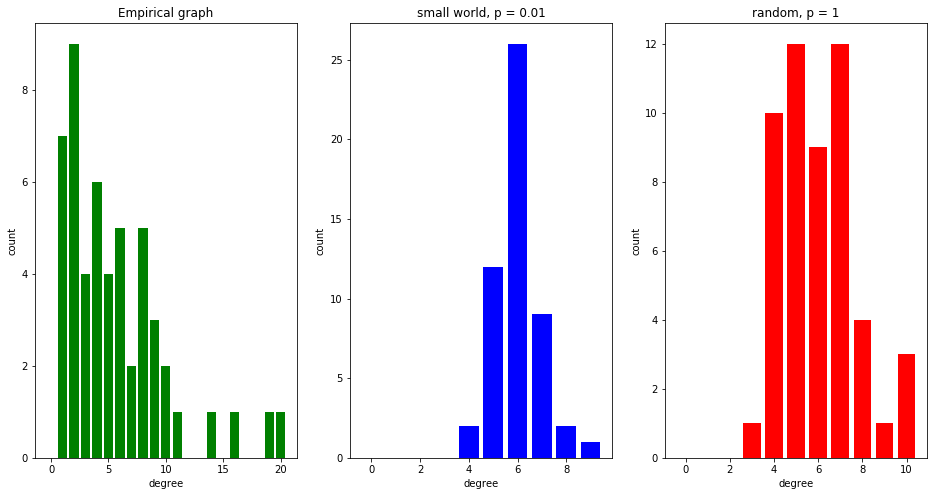

In [48]:
#G1:
degrees1 = list(dict(nx.degree(g_a)).values())
counts1,bins1 = np.histogram(degrees1,bins=np.arange(0,np.max(degrees1)+2))
#G2:
degrees2 = list(dict(nx.degree(sw_ga)).values())
counts2,bins2 = np.histogram(degrees2,bins=np.arange(0,np.max(degrees2)+2))
#G3:
degrees3 = list(dict(nx.degree(ran_ga)).values())
counts3,bins3 = np.histogram(degrees3,bins=np.arange(0,np.max(degrees3)+2))


plt.figure(figsize=(16,8)) #you only have to use this line once and fill in the blank spaces

#G1:
plt.subplot(1,3,1)
plt.bar(bins1[:-1],counts1,color='g')
plt.xlabel('degree')
plt.ylabel('count')
plt.title('Empirical graph')

#G2:
plt.subplot(1,3,2)
plt.bar(bins2[:-1],counts2,color='b')
plt.xlabel('degree')
plt.ylabel('count')
plt.title('small world, p = 0.01')

#G3:
plt.subplot(1,3,3)
plt.bar(bins3[:-1],counts3,color='r')
plt.xlabel('degree')
plt.ylabel('count')
plt.title('random, p = 1');



## Plots in same figure

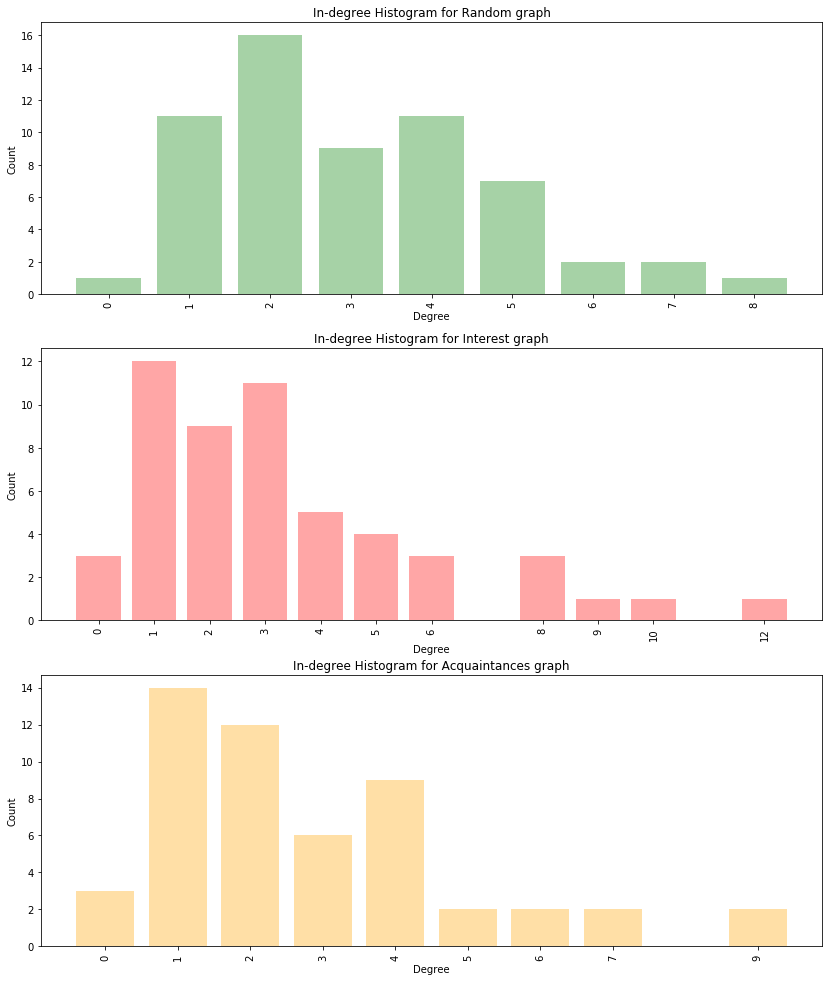

In [35]:

fig = plt.figure(figsize=(14,17))
ax1 = plt.subplot(3,1,1)
## plot histogram of in_degree distribution
degree_sequence = sorted([d for n, d in g_r.in_degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

# fig, ax = plt.subplots(figsize=(18,6))
plt.bar(deg, cnt, width=0.80, color="g", alpha = 0.35)

plt.title("In-degree Histogram for Random graph")
plt.ylabel("Count")
plt.xlabel("Degree")
ax1.set_xticks([d  for d in deg])
plt.xticks(rotation=90)
ax1.set_xticklabels(deg);

ax2 = plt.subplot(3,1,2)
## plot histogram of in_degree distribution
degree_sequence = sorted([d for n, d in g_i.in_degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

# fig, ax = plt.subplots(figsize=(18,6))
plt.bar(deg, cnt, width=0.80, color="r", alpha = 0.35)

plt.title("In-degree Histogram for Interest graph")
plt.ylabel("Count")
plt.xlabel("Degree")
ax2.set_xticks([d  for d in deg])
plt.xticks(rotation=90)
ax2.set_xticklabels(deg);

ax3= plt.subplot(3,1,3)
## plot histogram of in_degree distribution
degree_sequence = sorted([d for n, d in g_a.in_degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

# fig, ax = plt.subplots(figsize=(18,6))
plt.bar(deg, cnt, width=0.80, color="orange", alpha = 0.35)

plt.title("In-degree Histogram for Acquaintances graph")
plt.ylabel("Count")
plt.xlabel("Degree")
ax3.set_xticks([d  for d in deg])
plt.xticks(rotation=90)
ax3.set_xticklabels(deg);